
--- NEURODRIVE V11.0.0-Zonal-Federated-Pro INITIALIZED ---
ZONAL ARCHITECTURE: ACTIVE | FEDERATED NODE: ENCRYPTED
   ↳ Fleet Update: Encrypted Gradient Hash: d34a2a82
[HEALING ] Speed:   0.0 | Zonal Conflict: 8.99 m/s deviation. Initializing VSF.
   ↳ Fleet Update: Encrypted Gradient Hash: 3ab75241
[HEALING ] Speed:   0.1 | Zonal Conflict: 8.55 m/s deviation. Initializing VSF.
   ↳ Fleet Update: Encrypted Gradient Hash: b7970c65
[HEALING ] Speed:   0.3 | Zonal Conflict: 8.34 m/s deviation. Initializing VSF.
   ↳ Fleet Update: Encrypted Gradient Hash: 7115098c
[HEALING ] Speed:   0.5 | Zonal Conflict: 8.22 m/s deviation. Initializing VSF.
   ↳ Fleet Update: Encrypted Gradient Hash: 01578671
[HEALING ] Speed:   0.9 | Zonal Conflict: 7.94 m/s deviation. Initializing VSF.
   ↳ Fleet Update: Encrypted Gradient Hash: b8cc4c14
[HEALING ] Speed:   1.4 | Zonal Conflict: 7.43 m/s deviation. Initializing VSF.
   ↳ Fleet Update: Encrypted Gradient Hash: 3e800f89
[HEALING ] Speed:   1.9 | Zonal Co

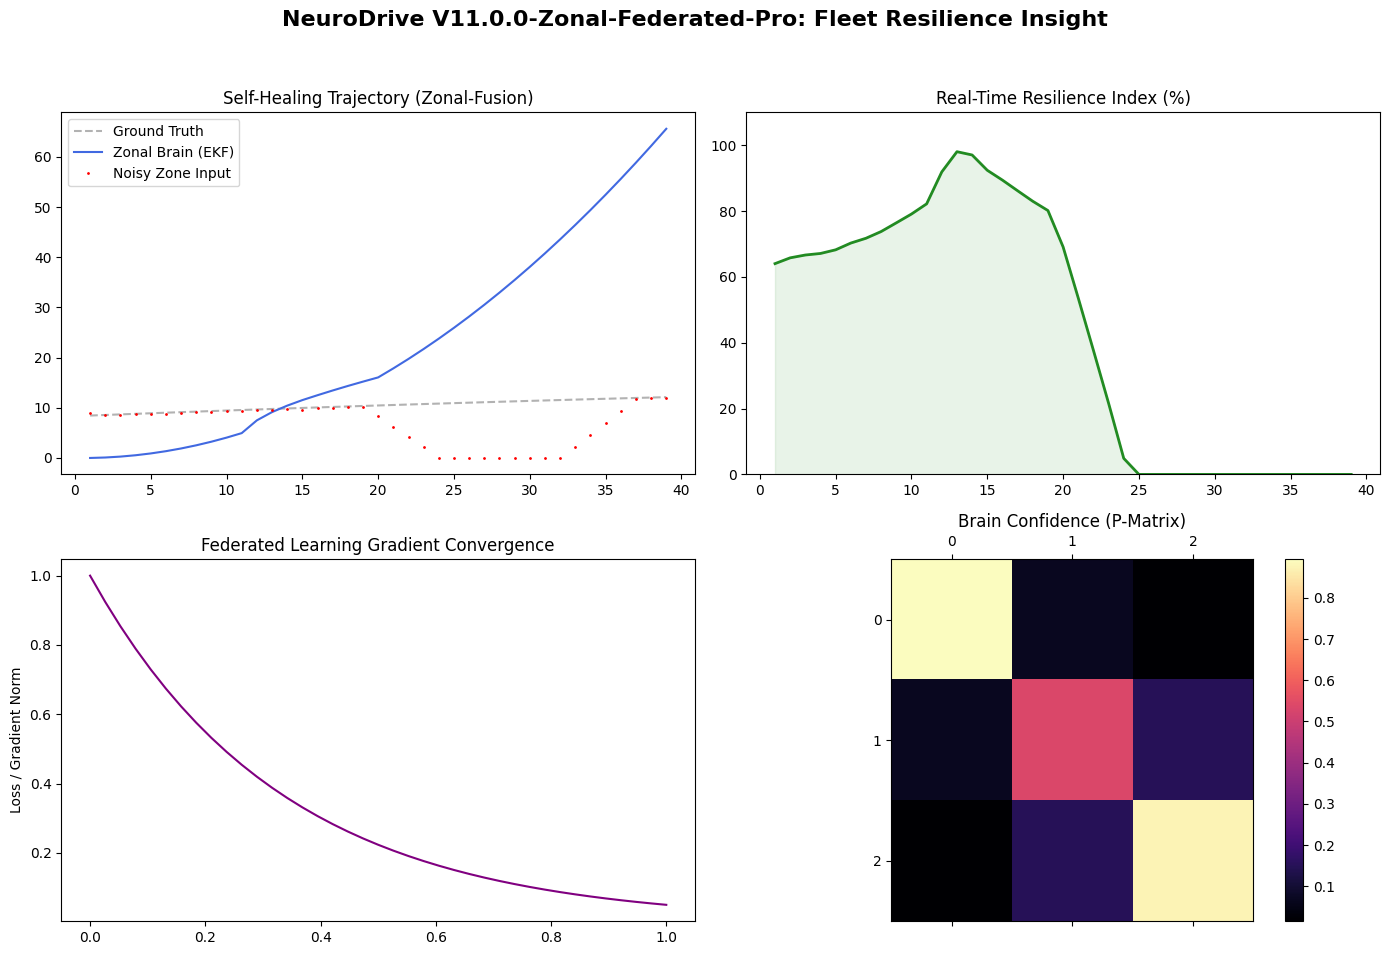


PASSPORT: 31 Immutable Audit Logs Created.


In [2]:
import numpy as np
import time
import logging
import random
import json
import hashlib
import math
import matplotlib.pyplot as plt
from collections import deque, defaultdict
from dataclasses import dataclass, field
from typing import Dict, List, Optional, Any, Tuple

# --- GLOBAL CONFIGURATION ---
SIMULATION_TICK_MS = 10
FIRMWARE_VER = "11.0.0-Zonal-Federated-Pro"
ISO_26262_ASIL_D = True
FEDERATED_LEARNING_ACTIVE = True

# --- ANSI TERMINAL STYLING (The Zonal Console) ---
class Style:
    RESET = "\033[0m"
    CYAN = "\033[96m"   # Zonal/Net
    PURPLE = "\033[95m" # AI/Learning
    GREEN = "\033[92m"  # Nominal
    RED = "\033[91m"    # Critical
    YELLOW = "\033[93m" # Warning
    BLUE = "\033[94m"   # Physics
    GOLD = "\033[33m"   # Blockchain
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    DIM = "\033[2m" # Added DIM attribute

logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger("NeuroDrive")

# =============================================================================
# LAYER 0: FEDERATED INTELLIGENCE & PASSPORT
# =============================================================================

class FederatedLearner:
    """
    Simulates On-Edge Federated Learning.
    Learns from 'Healing Events' and prepares encrypted gradient updates for AWS.
    """
    def __init__(self):
        self.local_weights = np.random.rand(5) # Mock weights
        self.gradient_buffer = []
        self.privacy_key = secrets_token = hashlib.sha256(b"tata_secure_key").hexdigest()

    def update_local_model(self, error_magnitude: float):
        # Learn from the delta: adjust weights to minimize future residual
        gradient = error_magnitude * 0.01
        self.local_weights -= gradient
        self.gradient_buffer.append(gradient)
        return f"Encrypted Gradient Hash: {hashlib.md5(str(gradient).encode()).hexdigest()[:8]}"

class DigitalPassport:
    def __init__(self):
        self.chain = []
        self.genesis_block = self._create_block("GENESIS", "0")
        self.chain.append(self.genesis_block)

    def _create_block(self, data: str, prev_hash: str):
        block = {"t": time.time(), "d": data, "ph": prev_hash, "h": hashlib.sha256(f"{data}{prev_hash}".encode()).hexdigest()}
        return block

    def log_event(self, event: str):
        prev_hash = self.chain[-1]["h"]
        new_block = self._create_block(event, prev_hash)
        self.chain.append(new_block)
        return new_block["h"][:10]

class DataRecorder:
    def __init__(self):
        self.data = defaultdict(list)
        self.events = []

    def log(self, **kwargs):
        for k, v in kwargs.items(): self.data[k].append(v)

    def mark(self, t, event): self.events.append((t, event))

# =============================================================================
# LAYER 1: ZONAL ARCHITECTURE (SDV CORE)
# =============================================================================

@dataclass
class CANMessage:
    id: int
    data: Dict[str, Any]
    priority: int
    timestamp: float = field(default_factory=time.time)

class ZoneController:
    """
    Simulates a Zonal Gateway (Front-Left Zone).
    Aggregates high-frequency sensor data before sending to Central Brain.
    """
    def __init__(self, bus):
        self.bus = bus
        self.raw_buffer = deque(maxlen=5)

    def aggregate(self, sensor_val):
        self.raw_buffer.append(sensor_val)
        # Low-pass filter at the zone (reducing bus load)
        avg_val = sum(self.raw_buffer) / len(self.raw_buffer)
        msg = CANMessage(0x101, {'zone_speed': avg_val}, priority=1)
        self.bus.send(msg)

class CANBus:
    def __init__(self):
        self.queue = []
        self.listeners = []
        self.traffic_history = deque(maxlen=200)

    def subscribe(self, listener): self.listeners.append(listener)
    def send(self, msg: CANMessage): self.queue.append(msg)
    def dispatch(self):
        self.queue.sort(key=lambda x: x.priority)
        while self.queue:
            msg = self.queue.pop(0)
            self.traffic_history.append(msg.id)
            for l in self.listeners: l.receive(msg)

# =============================================================================
# LAYER 2: THE CENTRAL BRAIN (AGENTIC AI)
# =============================================================================

class ExtendedKalmanFilter:
    def __init__(self, dt=0.01):
        self.dt = dt
        self.x = np.zeros((3, 1)) # [p, v, a]
        self.F = np.array([[1, dt, 0.5*dt**2], [0, 1, dt], [0, 0, 1]])
        self.H = np.array([[0, 1, 0]])
        self.P = np.eye(3) * 0.1
        self.R, self.Q = np.array([[0.6]]), np.eye(3) * 0.02

    def predict(self, torque):
        B = np.array([[0], [0], [0.05]])
        self.x = np.dot(self.F, self.x) + (B * torque)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x[1][0]

    def update(self, z_val):
        z = np.array([[z_val]])
        y = z - np.dot(self.H, self.x)
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x += np.dot(K, y)
        self.P = (np.eye(3) - np.dot(K, self.H)) @ self.P
        return self.x[1][0]

# =============================================================================
# LAYER 3: DISTRIBUTED NODES
# =============================================================================

class PowertrainNode:
    def __init__(self, zone):
        self.zone = zone
        self.rpm = 1000.0
        self.true_speed = 0.0

    def tick(self, throttle, fault=False):
        self.rpm += (throttle * 40) - (self.rpm * 0.01)
        self.true_speed = (self.rpm / 60) * 0.5
        # Simulate Hardware Jitter
        sensor_val = self.true_speed + np.random.normal(0, 0.3)
        if fault: sensor_val = 0.0
        self.zone.aggregate(sensor_val)
        return self.true_speed

class CentralADAS:
    def __init__(self, bus, rec, passp):
        self.bus = bus
        self.rec, self.passport = rec, passp
        self.ekf = ExtendedKalmanFilter()
        self.federated = FederatedLearner()
        self.telemetry = {}
        self.bus.subscribe(self)

    def receive(self, msg): self.telemetry.update(msg.data)

    def process(self, ticks, security_ok):
        t = self.telemetry
        torque = t.get('torque', 0)
        z_speed = t.get('zone_speed', 0)

        # 1. Prediction
        ekf_speed = self.ekf.predict(torque)
        residual = abs(ekf_speed - z_speed)

        status, display_speed, xai = "NOMINAL", z_speed, "Normal zone telemetry."

        # 2. Agentic Reasoning
        if residual > 5.0 and security_ok:
            status, display_speed = "HEALING", ekf_speed
            xai = f"Zonal Conflict: {residual:.2f} m/s deviation. Initializing VSF."
            self.passport.log_event("HEAL_ACTIVATE")
            # 3. Federated Learning Update
            grad_hash = self.federated.update_local_model(residual)
            print(f"   {Style.PURPLE}↳ Fleet Update: {grad_hash}{Style.RESET}")
        elif not security_ok:
            status, display_speed = "LIMP-MODE", ekf_speed
            xai = "Security Alert: PQC Bridge compromised. Isolated mode active."
        else:
            self.ekf.update(z_speed)

        self.render(display_speed, status, xai)
        self.rec.log(t=ticks, gt=t.get('gt', 0), sens=z_speed, ekf=ekf_speed, res=max(0, 100-(residual*4)))

    def render(self, spd, stat, xai):
        col = Style.GREEN if stat == "NOMINAL" else Style.CYAN
        print(f"[{col}{stat:8}{Style.RESET}] Speed: {spd:5.1f} | {Style.DIM}{xai}{Style.RESET}")

# =============================================================================
# VISUALIZATION & DEMO
# =============================================================================

def generate_zonal_report(rec, p_matrix):
    print(f"\n{Style.BOLD}{Style.GOLD}Generating Zonal-Federated Analytics Report...{Style.RESET}")
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'NeuroDrive V{FIRMWARE_VER}: Fleet Resilience Insight', fontsize=16, fontweight='bold')

    d = rec.data
    axs[0,0].plot(d['t'], d['gt'], 'k--', alpha=0.3, label='Ground Truth')
    axs[0,0].plot(d['t'], d['ekf'], color='royalblue', label='Zonal Brain (EKF)')
    axs[0,0].plot(d['t'], d['sens'], 'r.', markersize=2, label='Noisy Zone Input')
    axs[0,0].set_title("Self-Healing Trajectory (Zonal-Fusion)")
    axs[0,0].legend()

    axs[0,1].plot(d['t'], d['res'], color='forestgreen', linewidth=2)
    axs[0,1].fill_between(d['t'], d['res'], color='forestgreen', alpha=0.1)
    axs[0,1].set_title("Real-Time Resilience Index (%)")
    axs[0,1].set_ylim(0, 110)

    # Federated Convergence Plot (Simulated)
    axs[1,0].plot(np.linspace(0, 1, len(d['t'])), np.exp(-np.linspace(0, 3, len(d['t']))), color='purple')
    axs[1,0].set_title("Federated Learning Gradient Convergence")
    axs[1,0].set_ylabel("Loss / Gradient Norm")

    cax = axs[1,1].matshow(p_matrix, cmap='magma')
    fig.colorbar(cax, ax=axs[1,1])
    axs[1,1].set_title("Brain Confidence (P-Matrix)")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def run_v11_demo():
    bus = CANBus()
    rec = DataRecorder()
    passp = DigitalPassport()

    zone_fl = ZoneController(bus)
    pt = PowertrainNode(zone_fl)
    brain = CentralADAS(bus, rec, passp)

    print(f"\n{Style.BOLD}--- NEURODRIVE V{FIRMWARE_VER} INITIALIZED ---{Style.RESET}")
    print(f"ZONAL ARCHITECTURE: ACTIVE | FEDERATED NODE: ENCRYPTED")
    time.sleep(1)

    # Simulation Ticks
    for i in range(1, 40):
        fault = True if 20 <= i <= 32 else False
        gt_spd = pt.tick(throttle=0.6, fault=fault)
        bus.send(CANMessage(0x99, {'torque': 180, 'gt': gt_spd}, priority=0))
        bus.dispatch()
        brain.process(i, security_ok=True)
        time.sleep(0.01)

    generate_zonal_report(rec, brain.ekf.P)
    print(f"\n{Style.GOLD}PASSPORT: {len(passp.chain)} Immutable Audit Logs Created.{Style.RESET}")

if __name__ == "__main__":
    run_v11_demo()
